<a href="https://colab.research.google.com/github/nischalp114/MSCS_634_ProjectDeliverable_2/blob/main/Deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression -> R²: 0.079412, MSE: 1840.244023, RMSE: 42.898065
Ridge Regression -> R²: 0.079413, MSE: 1840.242855, RMSE: 42.898052

Model Comparison:
                Model  R2 Score          MSE       RMSE
0  Linear Regression  0.079412  1840.244023  42.898065
1   Ridge Regression  0.079413  1840.242855  42.898052


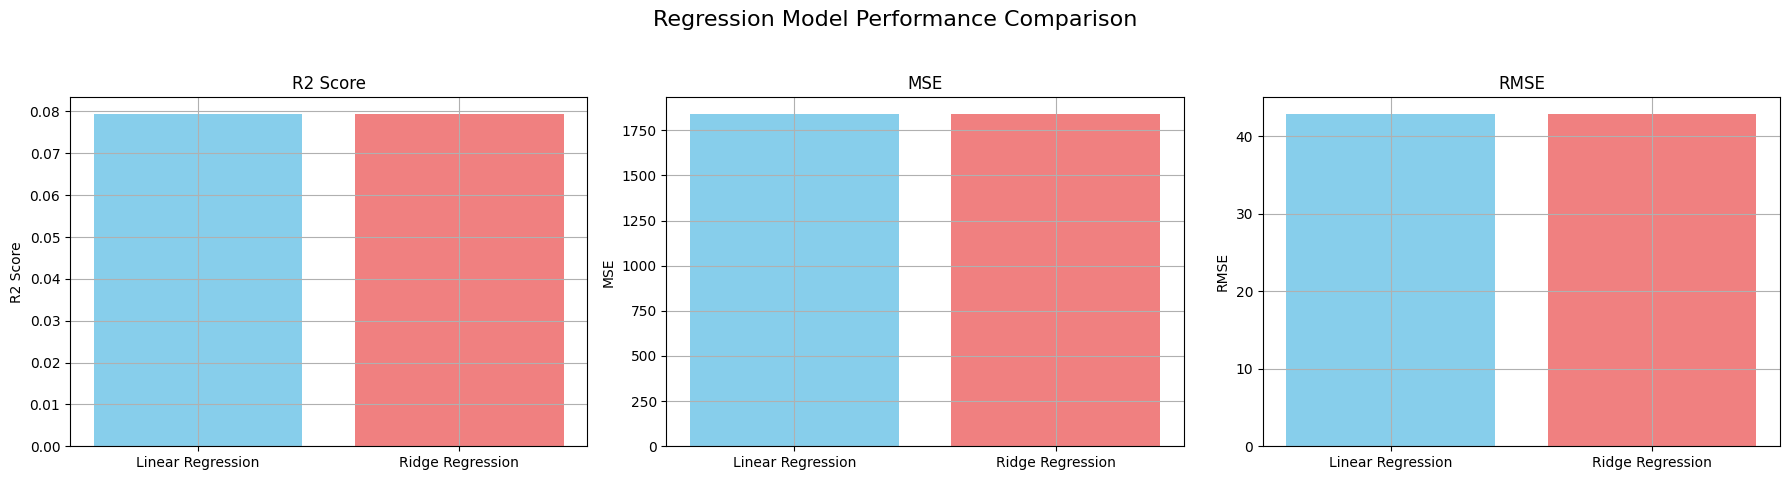


Cross-Validation Results (5-Fold):
Linear Regression CV R²: [0.11718091 0.08315298 0.05895072 0.09492614 0.07820191]
Average CV R² (Linear): 0.08648253207787941
Ridge Regression CV R²: [0.11716604 0.08316187 0.0589525  0.09492711 0.07820525]
Average CV R² (Ridge): 0.08648255544397032


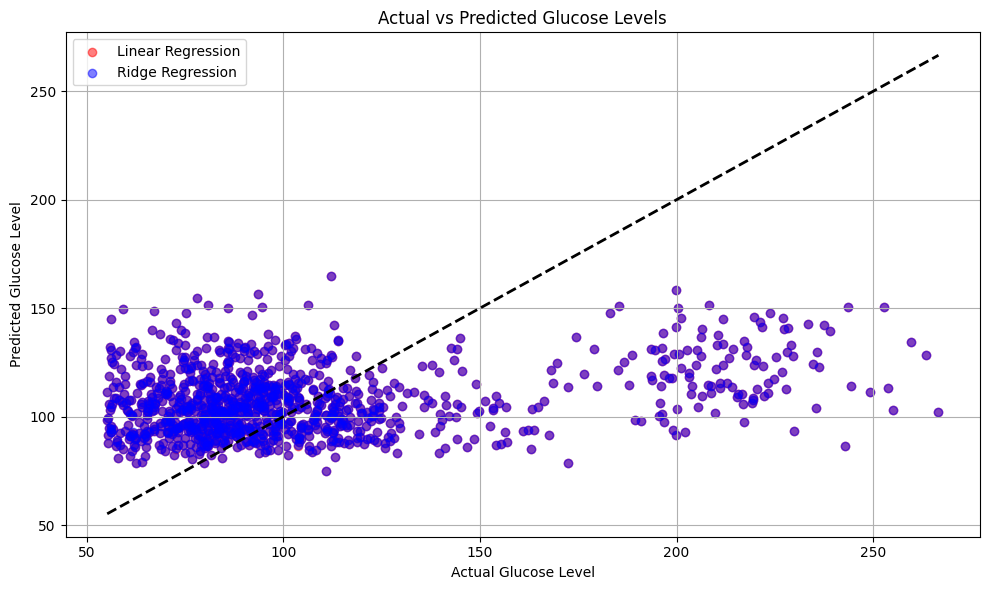

In [13]:
# Deliverable 2: Regression Modeling and Evaluation

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# --- Load and Clean the Dataset ---
df = pd.read_csv("stroke_data.csv")

# Remove rows where gender is 'Other'
df = df[df['gender'] != 'Other']

# Fill missing BMI values with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# --- Feature Engineering and Preprocessing ---

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define the features and target
X = df_encoded.drop(columns=['avg_glucose_level'])  # Predicting glucose level
y = df_encoded['avg_glucose_level']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Build Regression Models ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# --- Model Evaluation ---
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} -> R²: {r2:.6f}, MSE: {mse:.6f}, RMSE: {rmse:.6f}")
    return [name, r2, mse, rmse]

# Store results for both models
results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Ridge Regression", y_test, y_pred_ridge))

# Create comparison table
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MSE", "RMSE"])
print("\nModel Comparison:\n", results_df)

# --- Visualize Model Comparison ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['R2 Score', 'MSE', 'RMSE']
colors = ['skyblue', 'lightcoral']

for i, metric in enumerate(metrics):
    ax[i].bar(results_df['Model'], results_df[metric], color=colors)
    ax[i].set_title(metric)
    ax[i].set_ylabel(metric)
    ax[i].grid(True)

plt.suptitle("Regression Model Performance Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Cross-Validation ---
print("\nCross-Validation Results (5-Fold):")

# Linear Regression Cross-Validation
lr_cv = cross_val_score(lin_reg, X_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV R²:", lr_cv)
print("Average CV R² (Linear):", lr_cv.mean())

# Ridge Regression Cross-Validation
ridge_cv = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
print("Ridge Regression CV R²:", ridge_cv)
print("Average CV R² (Ridge):", ridge_cv.mean())

# --- Scatter Plot of Actual vs Predicted Values ---

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='red')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge Regression', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Glucose Level")
plt.ylabel("Predicted Glucose Level")
plt.title("Actual vs Predicted Glucose Levels")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()